<a href="https://colab.research.google.com/github/metetolga/DeepLearningBasics/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [16]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

preflatten = y_train.shape
X_train, X_test = X_train / 255, X_test / 255
y_train, y_test = y_train.flatten(), y_test.flatten()

print(f'train data of X shape: {X_train.shape}')
print(f'before flatten the y_train: {preflatten}, after: {y_train.shape}')

train data of X shape: (50000, 32, 32, 3)
before flatten the y_train: (50000, 1), after: (50000,)


In [17]:
# number of unique classes
K = len(np.unique(y_train))
print(f'# unique classes: {K}')

# unique classes: 10


In [21]:
i = Input(shape=X_train[0].shape)

x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [22]:
model.compile(
  optimizer = 'adam',
  loss = 'sparse_categorical_crossentropy',
  metrics = ['accuracy']
)

In [23]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 20s 10ms/step - loss: 1.3066 - accuracy: 0.5506 - val_loss: 1.1839 - val_accuracy: 0.5914
Epoch 2/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8527 - accuracy: 0.7045 - val_loss: 0.8997 - val_accuracy: 0.6917
Epoch 3/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6865 - accuracy: 0.7617 - val_loss: 0.9230 - val_accuracy: 0.7148
Epoch 4/15
1563/1563 [==============================] - 13s 9ms/step - loss: 0.5836 - accuracy: 0.8003 - val_loss: 0.8844 - val_accuracy: 0.7198
Epoch 5/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4968 - accuracy: 0.8299 - val_loss: 0.6054 - val_accuracy: 0.8051
Epoch 6/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4183 - accuracy: 0.8553 - val_loss: 0.6636 - val_accuracy: 0.7947
Epoch 7/15
1563/1563 [==============================] - 13s 9ms/step - loss: 0.3619 - accuracy: 0.8745 - val_loss: 0.6387 - val_a

In [25]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(X_test, y_test), steps_per_epoch=steps_per_epoch, epochs=20)

Epoch 1/20
   4/1562 [..............................] - ETA: 34s - loss: 0.4338 - accuracy: 0.8750

<ipython-input-25-600104e6f236>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_generator, validation_data=(X_test, y_test), steps_per_epoch=steps_per_epoch, epochs=20)


1562/1562 [==============================] - 39s 25ms/step - loss: 0.4891 - accuracy: 0.8348 - val_loss: 0.5209 - val_accuracy: 0.8308
Epoch 2/20
1562/1562 [==============================] - 41s 26ms/step - loss: 0.4508 - accuracy: 0.8469 - val_loss: 0.5091 - val_accuracy: 0.8332
Epoch 3/20
1562/1562 [==============================] - 41s 26ms/step - loss: 0.4366 - accuracy: 0.8525 - val_loss: 0.4877 - val_accuracy: 0.8419
Epoch 4/20
1562/1562 [==============================] - 39s 25ms/step - loss: 0.4127 - accuracy: 0.8601 - val_loss: 0.4611 - val_accuracy: 0.8475
Epoch 5/20
1562/1562 [==============================] - 40s 25ms/step - loss: 0.3965 - accuracy: 0.8658 - val_loss: 0.4907 - val_accuracy: 0.8420
Epoch 6/20
1562/1562 [==============================] - 43s 27ms/step - loss: 0.3737 - accuracy: 0.8736 - val_loss: 0.4837 - val_accuracy: 0.8415
Epoch 7/20
1562/1562 [==============================] - 41s 26ms/step - loss: 0.3623 - accuracy: 0.8755 - val_loss: 0.4325 - val_accura

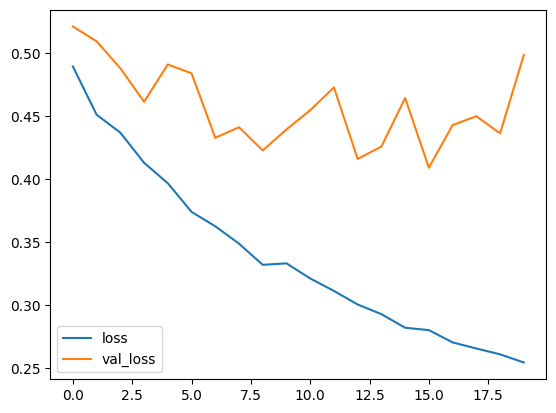

In [29]:
# Overfitting warning
# Loss is decreasing but validation loss is still or increasing
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

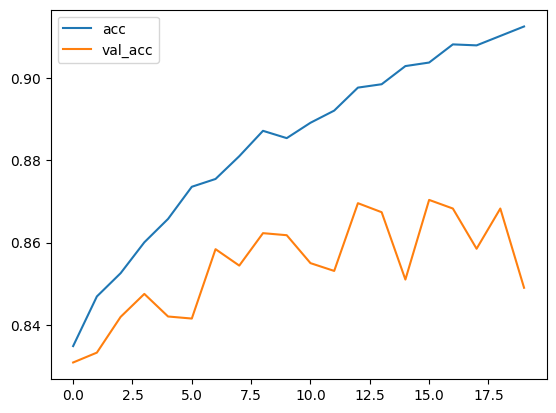

In [28]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [26]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0   